# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
df = pd.read_csv('dataframe.csv')

y = df["mau"]
X = df.drop("mau", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [17]:
#Definindo o objeto da árvore de decisão
clf_dt = DecisionTreeClassifier(random_state=100)

#Treinamento do algoritmo
clf_dt = clf_dt.fit(X,y)

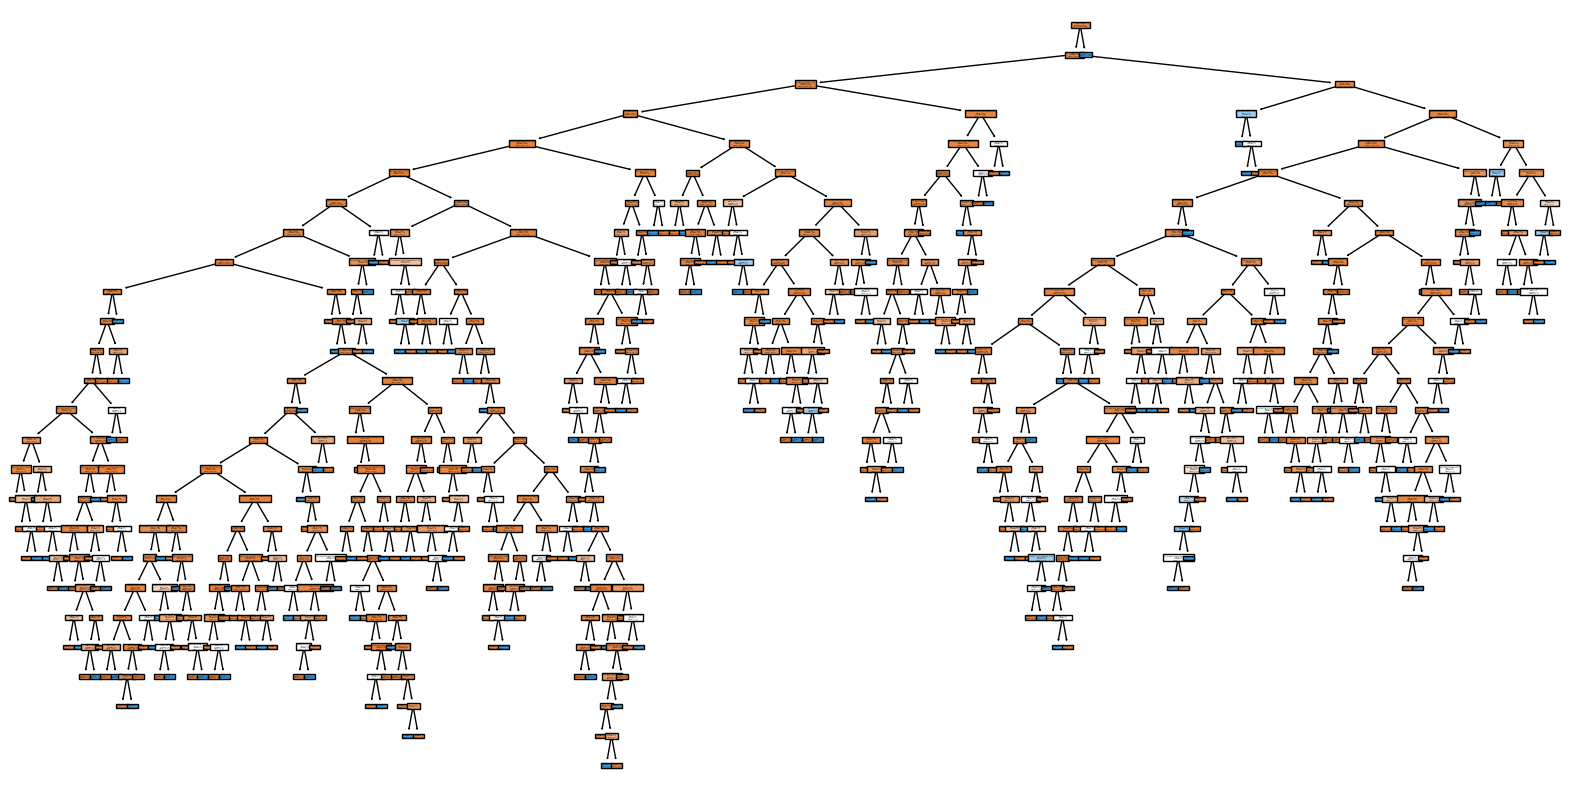

In [18]:
#Plot da árvore de decisão

plt.figure(figsize=(20, 10))
plot_tree(clf_dt,
          filled=True,
          feature_names=X.columns);

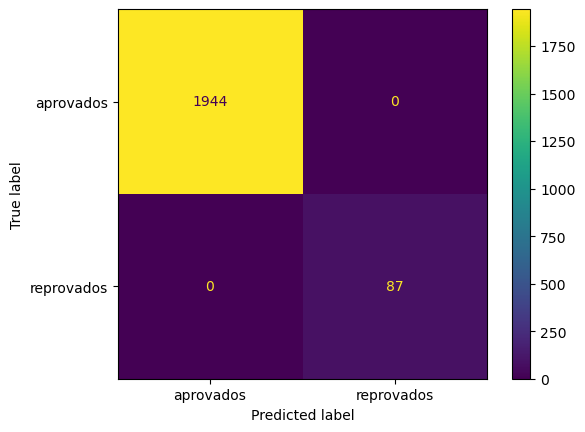

In [19]:
# Produza uma visualização da matriz de classificação (ou matriz de confusão)

class_names = ['aprovados', 'reprovados']
predicao_X = clf_dt.predict(X_test)
matriz_conf_train = confusion_matrix(y_test, predicao_X)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix = matriz_conf_train,
                                    display_labels = class_names)
cm_display_train.plot()
plt.show()

In [20]:
# Calculo da acurácia na base de treinamento

y_train_pred = clf_dt.predict(X_train)
acuracia_treino = accuracy_score(y_train, y_train_pred)

print(acuracia_treino)

1.0


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [21]:
# 1) Classifique a base de teste de acordo com a árvore que você 
# treinou no item 2.

teste_y_pred = clf_dt.predict(X_test)

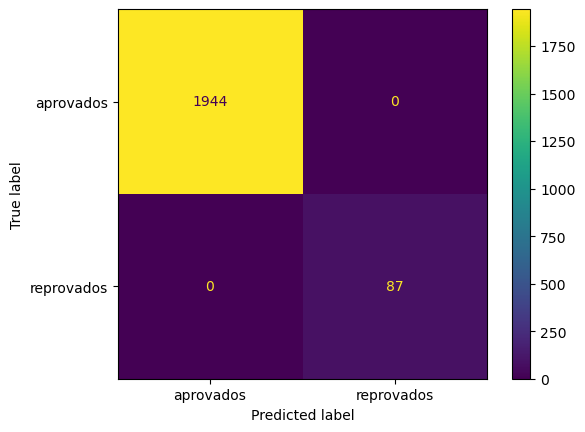

In [22]:
# 2) Produza a visualização da matriz de confusão para a base de teste.

cm_teste = confusion_matrix(y_test, teste_y_pred)
disp_teste = ConfusionMatrixDisplay(confusion_matrix = cm_teste, display_labels = ['aprovados', 'reprovados'])
disp_teste.plot()

In [23]:
#3) Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

acuracia_teste = accuracy_score(y_test, teste_y_pred)

print(acuracia_teste)

1.0


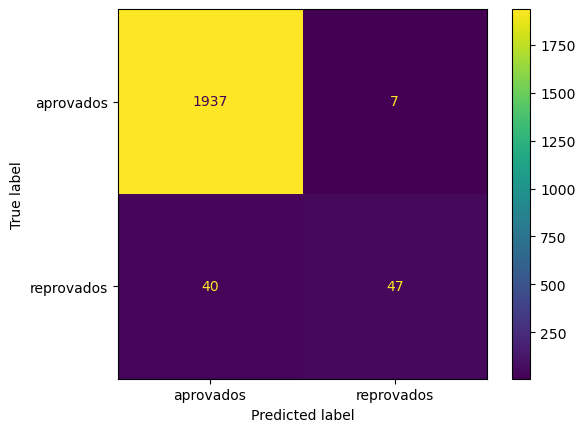

In [24]:
# 4) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de 
# profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. 
# Observe a distribuição da predição - qual a proporção de proponentes foram classificados 
# como 'maus'?

arvore_prof_10 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
arvore_prof_10.fit(X_train, y_train)
y_pred = arvore_prof_10.predict(X_test)

# Realizando a matriz de classificação da nova árvore
teste_y_pred_2 = arvore_prof_10.predict(X_test)
cm_teste_2 = confusion_matrix(y_test, teste_y_pred_2)
disp_teste_2 = ConfusionMatrixDisplay(confusion_matrix = cm_teste_2, display_labels=['aprovados', 'reprovados'])
disp_teste_2.plot()

In [25]:
# Calcular a proporção de 'maus'

proporcao_de_maus = np.count_nonzero(y_pred) / len(teste_y_pred_2)
print(proporcao_de_maus)

0.026587887740029542


In [26]:
# 5) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

y_pred_todos_bons = np.full(y_test.shape, 1)
acuracia_todos_bons = accuracy_score(y_test, y_pred_todos_bons)

print(acuracia_todos_bons)

0.04283604135893648
